# Crime analytics

We are going to answer the following question, for either city:

* How do incidents vary by time of day? 
* Which incidents are most common in the evening? 
* During what periods of the day are robberies most common?

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from subprocess import check_output
from datetime import datetime

sns.set_palette("Blues_d")

# Process San Francisco

## Load Data

In [75]:
incidents_sa = pd.read_csv('../input/sanfrancisco_incidents_summer_2014.csv')

## Inspect data

In [77]:
print(incidents_sa.columns)

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')


As we are interrested in time of day, and types of incidents the more interresting colums are 'Category' and 'Time'.

We display all possibles categories of incidents  to look for 'ROBBERY'.

In [83]:
unique_cat = pd.unique(incidents_sa['Category'])
print(unique_cat)
print(len(unique_cat))

['ARSON' 'NON-CRIMINAL' 'LARCENY/THEFT' 'DRUG/NARCOTIC'
 'DRIVING UNDER THE INFLUENCE' 'OTHER OFFENSES' 'TRESPASS' 'VEHICLE THEFT'
 'ASSAULT' 'FRAUD' 'SUSPICIOUS OCC' 'SECONDARY CODES' 'WEAPON LAWS'
 'MISSING PERSON' 'WARRANTS' 'ROBBERY' 'DRUNKENNESS' 'PROSTITUTION'
 'LIQUOR LAWS' 'KIDNAPPING' 'FAMILY OFFENSES' 'LOITERING'
 'DISORDERLY CONDUCT' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BURGLARY'
 'SUICIDE' 'VANDALISM' 'STOLEN PROPERTY' 'RUNAWAY' 'GAMBLING' 'EXTORTION'
 'PORNOGRAPHY/OBSCENE MAT' 'BRIBERY']
34


## How do incidents vary by time of day?

Firt of all we convert 'Time' to two different vaiables: 'Hours' and 'Minutes'.

In [92]:
def time_to_hours(x):
    return int(x.split(':')[0])
def time_to_min(x):
    h, m = [int(v) for v in x.split(':')]
    return h*60+m
incidents_sa['Hour'] = incidents_sa['Time'].apply(time_to_hours)
incidents_sa['Minutes'] = incidents_sa['Time'].apply(time_to_min)

We use a distplot on the minutes which are more precises.

As a control we also display incident count per hour.

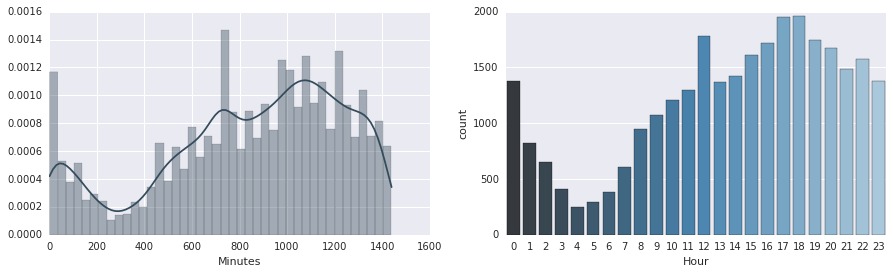

In [117]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(incidents_sa.Minutes, ax=ax1)
sns.countplot(data=incidents_sa, x='Hour', ax=ax2, palette='Blues_d')

From theses graph we can see a pic around noon and that globally incident are more present in the evening.

## During what periods of the day are robberies most common?

We apply the same display filtered on robbery category.

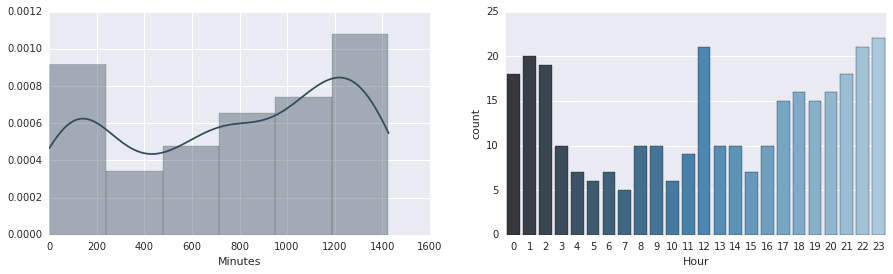

In [121]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(incidents_sa[incidents_sa['Category'] == 'ROBBERY'].Minutes, ax=ax1)
sns.countplot(data=incidents_sa[incidents_sa['Category'] == 'ROBBERY'], x='Hour', ax=ax2, palette='Blues_d')

Here we see still see the noon pic but also the the main activity is from 9pm to 2am.

## Which incidents are most common in the evening?

Here we define evening as eveyrthing between 19 and 23 included. We compute the variable 'Evening' on our dataset.

In [124]:
def is_evening(x):
    hour = int(x.split(':')[0])
    if hour >= 19 and hour <= 23:
        return True
    return False
incidents_sa['Evening'] = incidents_sa['Time'].apply(is_evening)

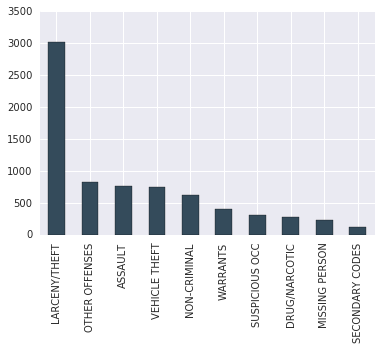

In [138]:
top10 = pd.Series(incidents_sa[incidents_sa['Evening'] == True].Category).value_counts().head(10)
top10.plot(kind='bar')

The most common incident during evening is LARCENY/THEFT

## Process Seattle

## Load data

In [141]:
incidents_se = pd.read_csv('../input/seattle_incidents_summer_2014.csv', low_memory=False)

## Inspect data

In [143]:
print(incidents_se.columns)

Index(['RMS CDW ID', 'General Offense Number', 'Offense Code',
       'Offense Code Extension', 'Offense Type', 'Summary Offense Code',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year'],
      dtype='object')


As we are interrested in time of day, and types of incidents the more interresting colums are 'Offense Type' and 'Occurred Date or Date Range Start'.

We display all possibles categories of incidents  to look for 'ROBBERY'.

In [144]:
print(pd.unique(incidents_se['Offense Type']))

['BURGLARY-FORCE-RES' 'FRAUD-IDENTITY THEFT' 'THEFT-MAIL' 'COUNTERFEIT'
 'THEFT-OTH' 'THEFT-BUILDING' 'FRAUD-CREDIT CARD' 'FRAUD-CHECK' 'EMBEZZLE'
 'BURGLARY-NOFORCE-NONRES' 'FRAUD-OTHER' 'THEFT-CARPROWL' 'HARASSMENT'
 'THEFT-AUTOACC' 'BURGLARY-NOFORCE-RES' 'PROPERTY DAMAGE-NON RESIDENTIA'
 'THEFT-LICENSE PLATE' 'PROPERTY LOST' 'FORGERY-CHECK' 'VEH-THEFT-AUTO'
 'BURGLARY-SECURE PARKING-RES' 'THEFT-PKPOCKET' 'THREATS-OTHER'
 'PROPERTY LOST - POLICE EQUIPME' 'THEFT-BICYCLE'
 'VEH-RCVD-FOR OTHER AGENCY' 'VEH-THEFT-MTRCYCLE' 'NARC-SELL-HEROIN'
 'DISPUTE-CIVIL PROPERTY (NON AU' 'VEH-THEFT-TRAILER' 'ASSLT-AGG-WEAPON'
 'PROPERTY FOUND' 'THREATS-KILL' 'DISPUTE-OTH' 'WARRARR-MISDEMEANOR'
 'ASSLT-AGG-BODYFORCE' 'PROPERTY DAMAGE-RESIDENTIAL' 'VEH-THEFT-TRUCK'
 'PROPERTY DAMAGE - GRAFFITI' 'THEFT-AUTO PARTS' 'ASSLT-NONAGG'
 'FRAUD-WIRE-ELECTRONIC' 'TRAFFIC' 'BURGLARY-FORCE-NONRES'
 'PROPERTY STOLEN-TRAFFICKING' 'THEFT-SHOPLIFT' 'DISTURBANCE-OTH'
 'VIOL-COURT ORDER' 'ILLEGAL DUMPING' 'PROSTITUTION-

Compared to San Francisco there is a lot more different types of incidents. It needs more pruning of the data to be able to compare the two cities.

## How do incidents vary by time of day?

First we extract hour base and minute base events from 'Occurred Date or Date Range Start'.

In [149]:
def get_hour(x):
    t = datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p')
    return t.hour
def get_minutes(x):
    t = datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p')
    return int(t.hour)*60+int(t.minute)
incidents_se['Hour'] = incidents_se['Occurred Date or Date Range Start'].apply(get_hour)
incidents_se['Minutes'] = incidents_se['Occurred Date or Date Range Start'].apply(get_minutes)

We use distplot and countplot to verify that the resampling is similar to the minute based barchart.

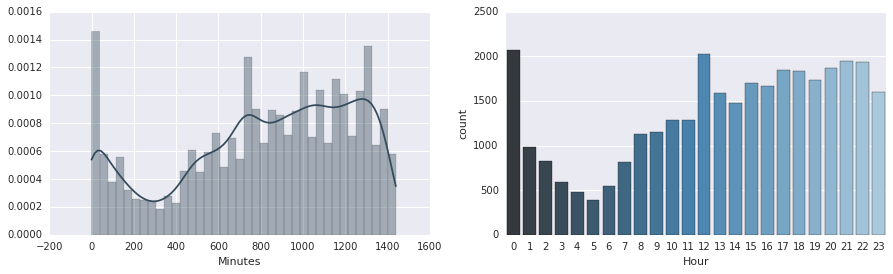

In [158]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(incidents_se.Minutes, ax=ax1)
sns.countplot(data=incidents_se, x='Hour', ax=ax2, palette='Blues_d')

Like San Francisco we can seen a pic around noon, but the second pic is later around midnight.

## During what periods of the day are robberies most common?

In order to find if a type is robbrey we look for 'ROBBERY' in the 'Offense Type'.

In [151]:
def is_robbery(x):
    if 'ROBBERY' in x:
        return True
    return False
incidents_se['Robbery'] = incidents_se['Offense Type'].apply(is_robbery)

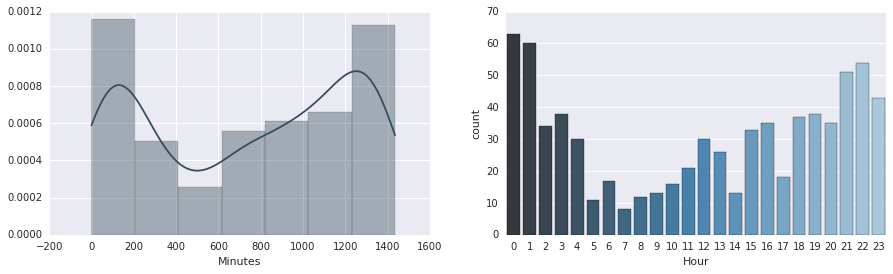

In [154]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(incidents_se[incidents_se['Robbery'] == True].Minutes, ax=ax1)
sns.countplot(data=incidents_se[incidents_se['Robbery'] == True], x='Hour', ax=ax2, palette='Blues_d')

Comapred to San Francisco the noon pic is absent for robbery and the most favorite hours are between 1 and 2 pm.

## Which incidents are most common in the evening?

As before, we define evening as eveyrthing between 19 and 23 included. We compute the variable 'Evening' on our dataset.

In [155]:
def is_evening_hour(x):
    if x >= 19 and x <= 23:
        return True
    return False
incidents_se['Evening'] = incidents_se['Hour'].apply(is_evening_hour)

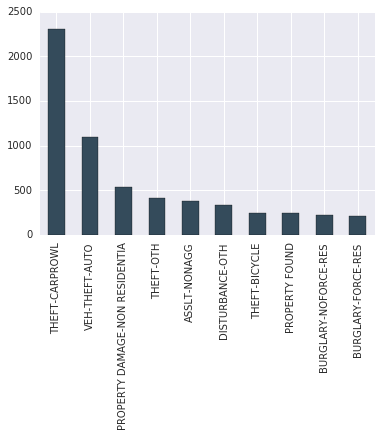

In [157]:
top10 = pd.Series(incidents_se[incidents_se['Evening'] == True]['Offense Type']).value_counts().head(10)
top10.plot(kind='bar')

Druning this period of time the most common incident is THEFT-CARPROWL. This result is not directly comparable to San Fransico as the categories differs.